# Modellieren echter Daten

Es soll die Reatkion :

butanal <--> butyroin <--> buteraldehyd 

modelliert werden

Der Gesamtverlauf sieht dabei so aus:

   T [min]     Butanal   butyroin  4,5-octanediol
0        0  235.403070   0.000000             0.0
1       15  136.667003  35.135764             0.0
2       30   78.775571  59.773672             0.0
3       60   39.501736  80.610846             0.0
4      140   15.373700  85.416647             0.0


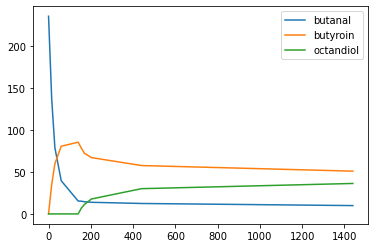

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"4,5-ODO Upscaling.xlsx")
print(df.head())

time = df["T [min]"]
butanal = df["Butanal"]
butyroin = df["butyroin"]
octandiol = df["4,5-octanediol"]

fig,ax = plt.subplots()

ax.plot(time, butanal, label = "butanal")
ax.plot(time, butyroin, label = "butyroin")
ax.plot(time, octandiol, label = "octandiol")
plt.legend()
plt.show()



# Schritt 1: Modellieren des Substratverlaufs

[[240.        ]
 [115.39234415]
 [ 75.96836553]
 [ 45.15540862]
 [ 21.76700349]
 [ 19.85514362]
 [ 18.25713069]
 [ 15.52533465]
 [  7.68686215]
 [  3.33601707]]


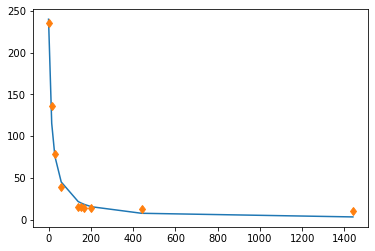

In [29]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit


time = df["T [min]"]
concentration_A0 = 240

def substrate_curve(A, t, k1, k2):
    dAdt = -k1*A**2 + k2*((concentration_A0-A)*0.5)
    return dAdt

solver_substrat = odeint(substrate_curve, concentration_A0, time, args=(0.0003,0.00002))
print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat)
ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()



# Einbinden des Ersten Produkts

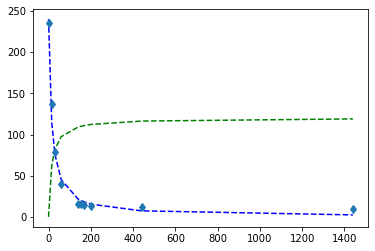

In [33]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit


time = df["T [min]"]

inital_conditions = [240,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2):
    A = init_cond[0]
    B = init_cond[1]

    dAdt = -k1*A**2 + k2*np.sqrt(concentration_A0-A)
    dBdt = (k1*A**2)*0.5 - k2*(k1*A**2)*0.5
    dZdt = np.array([dAdt,dBdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.00002))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()


# Einbinden des Zweiten produkts

0.0
0.00012206683555054524
0.00012206658713760369
0.00024413317427621849
0.00024413292586403527
0.05405598015862885
0.05405599642944088
0.10781957256435348
0.10781960504730004
0.1615349912261245
0.16153502365084507
0.4537582313109635
0.45375862279704376
0.36036313701608297
0.3603633201767762
0.2013535489584066
0.20135355637304497
0.24114563800193914
0.2411456305524889
0.280911271079955
0.28091127106576075
0.3206505042501747
0.3206505042355942
0.40004985377265284
0.40004985370284807
0.47934388887065593
0.4793438889062959
0.5585328191946823
0.5585328192303818
0.6376168535159752
0.6376168535166595
0.7165962000492
0.7165962000498894
1.5006772685037146
1.500677270357894
2.2745146383043324
2.274514641885261
3.0383077647014547
3.0383077574331443
3.7922509184084987
3.792250914736692
4.536533434331755
4.536533432072639
5.271339809286791
5.271339807130779
7.37312967992154
7.373129580451774
9.399273657246148
9.399273320448316
11.353782329076733
11.35378271215428
13.240390296140298
13.240390679171

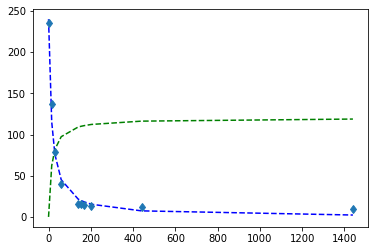

In [50]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit


time = df["T [min]"]

inital_conditions = [240,0]

concentration_A0 = 240
concentration_B0 = 0

def substrate_curve(init_cond, t, k1, k2, k3):
    A = init_cond[0]
    B = init_cond[1]

    dAdt = -k1*A**2 + k2*np.sqrt(concentration_A0-A)
    dBdt = (k1*A**2)*0.5 - (k2+k3)*(k1*A**2)*0.5
    print(B)

    dZdt = np.array([dAdt,dBdt])
    return dZdt

solver_substrat = odeint(substrate_curve, inital_conditions, time, args=(0.0003,0.00000002, 0.0003))
#print(solver_substrat)

fig, ax = plt.subplots()

ax.plot(time,solver_substrat[:,0], linestyle="--", color="blue")
ax.plot(time,solver_substrat[:,1], linestyle="--", color="green")

ax.plot(time,butanal, linestyle ="", marker = "d")

#plt.show()